In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from numpy import argmax
from sklearn.cross_validation import train_test_split
import serial
import csv
import time
import os
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

Using TensorFlow backend.
C:\Users\AbdurRehman\Miniconda3\envs\nnseries\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df_BD1 = pd.read_csv('BD1_data_5min.txt', header=None)
df_BD1 = pd.DataFrame(df_BD1[0].str.split(',').tolist())
features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']
df_BD1.columns = features
df_BD1.insert(128, 'Class', '1')
df_BD1.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
0,33195.0,95.5,13103.4,134.3,61.1,66.8,316.6,33.7,58.9,37.8,...,67.4,69.2,26.0,59.1,46.9,84.0,60.5,959.2,52.4\r\r\n,1
1,33072.0,112.9,13072.8,113.4,28.8,93.7,398.7,119.9,73.2,106.1,...,93.8,60.5,77.0,46.8,29.7,15.4,35.5,947.7,44.6\r\r\n,1
2,33031.0,196.6,13033.3,96.6,48.2,23.2,366.0,85.1,28.6,82.2,...,102.4,26.9,16.0,43.4,40.9,38.3,37.6,966.9,11.2\r\r\n,1
3,33091.0,81.5,13057.2,123.3,35.6,93.3,370.9,94.7,93.3,143.7,...,91.5,54.4,61.8,44.0,58.5,33.8,67.7,973.5,23.3\r\r\n,1
4,32989.0,107.6,13066.0,84.3,60.5,23.9,444.2,52.8,7.3,119.0,...,129.1,48.7,23.6,87.9,61.8,28.6,12.1,984.3,45.1\r\r\n,1


In [4]:
df_BD2 = pd.read_csv('BD2_data_5min.txt', header=None)
df_BD2 = pd.DataFrame(df_BD2[0].str.split(',').tolist())
features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']
df_BD2.columns = features
df_BD2.insert(128, 'Class', '2')
df_BD2.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
0,32920.0,216.7,13404.6,199.2,113.6,54.5,521.5,32.9,48.1,114.5,...,71.2,23.5,38.9,16.4,49.8,50.2,9.2,62.0,7.6\r\r\n,2
1,33020.0,154.2,13353.2,219.0,93.0,141.1,495.2,24.4,22.4,119.0,...,84.6,35.3,74.1,20.2,54.7,54.7,27.4,45.3,24.9\r\r\n,2
2,33087.0,164.0,13368.3,252.1,174.4,113.1,447.3,52.0,91.0,86.3,...,106.8,25.3,71.2,25.9,46.9,19.3,49.9,61.5,39.5\r\r\n,2
3,33152.0,133.4,13415.8,227.4,114.1,118.4,429.5,81.1,65.1,119.1,...,72.7,23.3,39.4,8.0,49.8,49.4,49.0,70.5,5.2\r\r\n,2
4,33146.0,139.6,13388.7,241.3,229.5,120.6,417.0,108.5,133.7,54.5,...,83.4,46.6,21.5,64.2,3.7,45.1,12.2,43.6,13.6\r\r\n,2


In [5]:
df_BD3 = pd.read_csv('BD3_data_5min.txt', header=None)
df_BD3 = pd.DataFrame(df_BD3[0].str.split(',').tolist())
features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']
df_BD3.columns = features
df_BD3.insert(128, 'Class', '3')
df_BD3.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
0,33296.0,298.5,12558.2,260.9,131.5,56.2,459.0,17.6,99.6,40.0,...,66.3,105.8,44.9,188.6,25.0,57.6,97.0,4119.3,89.2\r\r\n,3
1,33316.0,339.6,12607.6,274.1,83.7,107.5,328.5,72.2,30.7,16.5,...,22.8,116.3,49.9,93.1,55.6,36.0,75.7,4110.7,117.6\r\r\n,3
2,33346.0,356.9,12633.3,232.0,10.9,74.8,374.5,38.4,91.1,26.4,...,56.3,105.3,24.7,126.4,28.0,16.9,69.2,4112.3,87.7\r\r\n,3
3,33371.0,326.6,12582.1,274.9,159.4,87.7,458.5,82.9,10.7,83.0,...,116.9,48.2,122.9,144.9,24.3,50.9,119.7,4108.5,123.5\r\r\n,3
4,33342.0,318.1,12617.7,233.4,54.2,53.0,377.1,43.9,74.3,46.0,...,7.7,111.9,53.3,133.0,51.1,22.4,33.2,4106.1,108.5\r\r\n,3


In [6]:
df_LHB = pd.read_csv('LHB_data_5min.txt', header=None)
df_LHB = pd.DataFrame(df_LHB[0].str.split(',').tolist())
features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']
df_LHB.columns = features
df_LHB.insert(128, 'Class','4')
df_LHB.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
0,33176.0,148.5,12990.8,115.0,122.1,88.3,554.8,67.3,147.5,22.7,...,45.0,96.7,78.7,141.6,66.2,82.6,1.9,1529.3,25.0\r\r\n,4
1,33226.0,142.5,13012.4,154.1,126.7,102.4,523.6,34.3,124.5,19.7,...,57.4,126.0,64.3,118.9,49.0,68.2,14.6,1524.8,58.5\r\r\n,4
2,33143.0,86.0,12988.3,143.3,140.0,27.8,425.9,27.0,136.7,8.2,...,14.4,155.3,86.4,138.2,58.6,42.0,44.2,1514.0,36.0\r\r\n,4
3,33117.0,97.6,13018.8,144.3,73.8,80.6,578.4,69.3,139.2,34.1,...,59.6,100.4,65.5,164.0,14.5,2.5,61.1,1542.7,49.9\r\r\n,4
4,33082.0,113.8,13021.4,159.3,104.4,130.2,580.6,115.2,128.8,58.2,...,50.1,75.0,95.0,107.4,61.1,64.2,16.4,1587.6,21.4\r\r\n,4


In [7]:
df_BD1LHB = pd.read_csv('BD1+LHB_data_5min.txt', header=None)
df_BD1LHB = pd.DataFrame(df_BD1LHB[0].str.split(',').tolist())
features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']
df_BD1LHB.columns = features
df_BD1LHB.insert(128, 'Class','5')
df_BD1LHB.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
0,32990.0,199.7,12531.6,130.1,46.7,47.0,334.3,18.8,18.7,18.9,...,5.8,10.1,3.7,57.8,9.8,8.1,31.4,2387.2,32.6\r\r\n,5
1,32691.0,213.2,12551.2,137.9,74.8,44.7,342.8,22.4,16.1,21.9,...,2.7,8.6,11.8,61.2,11.1,6.7,26.3,2395.4,38.4\r\r\n,5
2,32933.0,148.8,12587.5,170.0,66.7,42.0,387.1,48.5,39.5,28.2,...,8.9,14.8,2.9,67.3,4.4,20.4,31.7,2393.0,29.3\r\r\n,5
3,32856.0,108.4,12611.0,185.7,118.8,74.3,358.6,61.4,52.5,52.6,...,15.1,2.4,14.1,66.3,8.3,27.4,34.1,2386.4,11.4\r\r\n,5
4,32712.0,182.8,12564.6,154.8,73.5,57.7,317.3,11.1,22.0,30.1,...,12.5,9.7,10.0,57.3,2.2,8.6,24.9,2394.3,32.9\r\r\n,5


In [8]:
df_BD2LHB = pd.read_csv('BD2+LHB_data_5min.txt', header=None)
df_BD2LHB = pd.DataFrame(df_BD2LHB[0].str.split(',').tolist())
features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']

df_BD2LHB.drop(128, axis=1, inplace=True)
df_BD2LHB.drop(129, axis=1, inplace=True)
df_BD2LHB.columns = features
df_BD2LHB.insert(128, 'Class','6')
df_BD2LHB.head()


,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
0,33066.0,9.3,12477.9,72.0,44.0,99.1,274.2,21.6,64.5,53.3,...,53.1,31.8,88.6,140.9,70.6,9.7,14.6,3853.8,50.5\r\r\n,6
1,33026.0,87.7,12531.1,87.9,51.9,26.1,421.7,36.0,115.6,41.8,...,88.4,84.7,20.5,50.8,37.1,37.6,50.7,3875.4,78.7\r\r\n,6
2,33025.0,100.1,12547.2,41.7,6.4,55.3,380.7,26.3,82.0,24.5,...,51.2,108.3,51.3,45.9,36.6,25.7,40.6,3884.6,38.5\r\r\n,6
3,33006.0,102.1,12524.2,95.3,51.1,8.7,426.3,46.2,98.2,39.4,...,24.4,104.3,27.9,203.9,16.9,46.4,36.4,3883.4,18.1\r\r\n,6
4,33001.0,106.4,12543.7,65.1,52.7,14.0,441.6,38.4,90.1,29.5,...,35.2,86.2,11.8,165.8,4.7,23.7,18.8,3882.1,34.3\r\r\n,6


In [9]:
df_EK = pd.read_csv('EK_data_5min.txt', header=None)
df_EK = pd.DataFrame(df_EK[0].str.split(',').tolist())
features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']

df_EK.drop(df_EK.columns[[128,129,130,131,132,133,134,135,136,137,138,139]], axis=1, inplace=True)
df_EK.columns = features
df_EK.insert(128, 'Class','7')
df_EK.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
0,33142.0,244.7,13968.6,196.3,263.6,80.9,434.9,46.9,64.3,48.8,...,12.1,76.2,26.3,78.1,8.3,200.7,25.3,104.1,9.8\r\r\n,7
1,33090.0,180.1,13943.6,229.2,242.5,89.6,366.8,97.0,17.2,108.0,...,40.3,89.6,45.2,28.9,22.0,192.5,9.3,147.7,37.4\r\r\n,7
2,33135.0,151.5,14261.7,221.8,309.4,109.5,362.2,102.9,99.0,52.3,...,40.5,30.3,48.8,144.0,18.1,188.2,21.5,129.1,32.5\r\r\n,7
3,32990.0,228.5,14169.7,273.9,254.1,44.2,398.3,41.2,56.5,68.1,...,58.3,72.8,155.2,62.0,123.9,118.9,60.1,30.6,21.9\r\r\n,7
4,32846.0,278.8,14117.5,177.9,127.5,207.5,310.7,52.6,70.0,80.5,...,56.8,65.0,29.2,85.2,144.6,74.4,85.4,65.5,33.2\r\r\n,7


In [10]:
df_SM = pd.read_csv('SM_data_3min.txt', header=None)
df_SM = pd.DataFrame(df_SM[0].str.split(',').tolist())
features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']

df_SM.columns = features
df_SM.insert(128, 'Class','8')
df_SM.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
0,32922.0,134.4,12692.2,123.7,51.5,46.4,341.3,17.0,18.7,25.8,...,9.7,7.1,2.8,50.5,4.5,5.4,15.6,1874.1,17.8\r\r\n,8
1,32737.0,144.7,12705.2,118.7,73.3,51.4,352.7,15.1,25.4,21.8,...,13.1,6.2,6.9,56.1,10.4,13.4,14.9,1862.0,23.1\r\r\n,8
2,32957.0,163.5,12684.1,111.9,22.2,32.5,364.6,19.0,21.2,18.3,...,6.3,2.1,1.1,49.2,5.6,7.5,15.9,1862.1,21.5\r\r\n,8
3,32716.0,151.8,12683.8,110.9,60.7,35.7,361.6,25.3,19.9,18.6,...,7.1,10.3,5.7,67.3,10.3,17.8,14.3,1871.3,27.1\r\r\n,8
4,32946.0,159.1,12692.0,115.6,42.4,31.5,364.2,23.6,30.6,31.2,...,8.6,6.4,3.4,54.8,5.5,15.1,14.6,1868.5,20.1\r\r\n,8


In [11]:
df_toaster = pd.read_csv('Toaster_data_3min.txt', header=None)
df_toaster = pd.DataFrame(df_toaster[0].str.split(',').tolist())
features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']

df_toaster.columns = features
df_toaster.insert(128, 'Class','9')
df_toaster.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
0,33017.0,192.2,13655.1,170.5,90.3,60.1,436.6,28.9,23.0,37.3,...,75.9,32.6,12.4,41.7,50.1,64.0,18.3,107.9,52.1\r\r\n,9
1,33077.0,135.8,13710.8,156.5,113.5,53.8,429.3,25.8,28.7,39.1,...,67.7,19.0,39.6,27.6,33.4,47.3,43.2,27.7,78.7\r\r\n,9
2,33083.0,195.6,13721.6,182.3,106.1,105.9,446.6,48.0,17.4,4.8,...,42.5,23.6,17.0,43.9,15.9,27.7,13.7,50.7,30.0\r\r\n,9
3,33093.0,181.5,13698.3,222.5,125.3,118.5,447.5,56.4,33.6,40.7,...,48.4,16.1,37.4,10.2,70.6,24.4,43.8,71.1,91.7\r\r\n,9
4,33049.0,168.4,13645.1,226.2,93.6,66.1,420.9,40.9,21.6,36.8,...,54.6,16.1,41.4,24.0,33.0,49.6,33.5,17.9,52.4\r\r\n,9


In [12]:
df_APPLIANCE = df_BD1.append(df_BD2, ignore_index=True)
df_APPLIANCE = df_APPLIANCE.append(df_BD3, ignore_index=True)
df_APPLIANCE = df_APPLIANCE.append(df_LHB, ignore_index=True)
df_APPLIANCE = df_APPLIANCE.append(df_BD1LHB, ignore_index=True)
df_APPLIANCE = df_APPLIANCE.append(df_BD2LHB, ignore_index=True)
df_APPLIANCE = df_APPLIANCE.append(df_EK, ignore_index=True)
df_APPLIANCE = df_APPLIANCE.append(df_SM, ignore_index=True)
df_APPLIANCE = df_APPLIANCE.append(df_toaster, ignore_index=True)
df_APPLIANCE.tail()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
25821,33045.0,194.7,13449.0,395.5,161.3,135.1,447.5,162.7,110.7,125.8,...,100.9,32.7,89.3,45.2,46.7,25.6,18.8,31.6,14.7\r\r\n,9
25822,32996.0,257.0,13485.3,367.6,154.7,153.5,492.5,117.0,73.1,130.8,...,115.2,75.9,68.3,17.3,36.5,30.9,30.8,12.5,23.8\r\r\n,9
25823,33056.0,235.5,13485.6,336.3,207.2,124.3,420.1,102.0,83.8,137.7,...,49.0,36.7,90.6,72.9,39.8,31.0,42.3,64.6,21.6\r\r\n,9
25824,33006.0,219.7,13455.7,325.8,192.1,128.5,417.5,102.6,87.0,52.6,...,43.2,67.9,30.2,21.9,55.0,28.2,57.2,32.9,67.9\r\r\n,9
25825,33073.0,202.8,13461.9,353.2,176.6,184.6,443.1,114.9,192.0,139.4,...,62.3,72.3,48.7,72.6,13.5,21.4,33.6,33.0,13.9\r\r\n,9


In [13]:
#Replace the \r\r\n in i63
df_APPLIANCE.i63 = df_APPLIANCE.i63.str.replace('\r\r\n','')
df_APPLIANCE.tail()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
25821,33045.0,194.7,13449.0,395.5,161.3,135.1,447.5,162.7,110.7,125.8,...,100.9,32.7,89.3,45.2,46.7,25.6,18.8,31.6,14.7,9
25822,32996.0,257.0,13485.3,367.6,154.7,153.5,492.5,117.0,73.1,130.8,...,115.2,75.9,68.3,17.3,36.5,30.9,30.8,12.5,23.8,9
25823,33056.0,235.5,13485.6,336.3,207.2,124.3,420.1,102.0,83.8,137.7,...,49.0,36.7,90.6,72.9,39.8,31.0,42.3,64.6,21.6,9
25824,33006.0,219.7,13455.7,325.8,192.1,128.5,417.5,102.6,87.0,52.6,...,43.2,67.9,30.2,21.9,55.0,28.2,57.2,32.9,67.9,9
25825,33073.0,202.8,13461.9,353.2,176.6,184.6,443.1,114.9,192.0,139.4,...,62.3,72.3,48.7,72.6,13.5,21.4,33.6,33.0,13.9,9


In [14]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df_APPLIANCE)

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,i55,i56,i57,i58,i59,i60,i61,i62,i63,Class
0,33195.0,95.5,13103.4,134.3,61.1,66.8,316.6,33.7,58.9,37.8,...,67.4,69.2,26.0,59.1,46.9,84.0,60.5,959.2,52.4,1.0
1,33072.0,112.9,13072.8,113.4,28.8,93.7,398.7,119.9,73.2,106.1,...,93.8,60.5,77.0,46.8,29.7,15.4,35.5,947.7,44.6,1.0
2,33031.0,196.6,13033.3,96.6,48.2,23.2,366.0,85.1,28.6,82.2,...,102.4,26.9,16.0,43.4,40.9,38.3,37.6,966.9,11.2,1.0
3,33091.0,81.5,13057.2,123.3,35.6,93.3,370.9,94.7,93.3,143.7,...,91.5,54.4,61.8,44.0,58.5,33.8,67.7,973.5,23.3,1.0
4,32989.0,107.6,13066.0,84.3,60.5,23.9,444.2,52.8,7.3,119.0,...,129.1,48.7,23.6,87.9,61.8,28.6,12.1,984.3,45.1,1.0
5,33065.0,127.0,13091.1,215.5,120.9,87.8,347.1,75.2,38.4,73.4,...,107.0,50.5,30.3,65.9,43.3,33.0,58.9,983.2,36.4,1.0
6,33092.0,35.3,13079.1,89.2,85.6,136.8,367.7,56.0,34.0,73.8,...,104.5,31.2,13.6,22.1,58.7,16.6,49.0,974.8,57.6,1.0
7,33119.0,53.1,13098.7,100.0,49.4,110.9,354.1,89.7,131.8,43.1,...,55.6,104.3,45.3,73.3,37.9,18.1,19.0,937.1,17.4,1.0
8,33114.0,50.3,13065.6,89.2,76.7,56.8,345.0,61.2,45.9,125.9,...,80.5,82.9,31.7,23.3,40.0,25.0,6.2,951.3,21.9,1.0
9,33217.0,113.5,13094.6,70.3,15.0,59.9,444.5,44.2,88.4,80.9,...,68.1,80.1,3.1,43.1,30.1,17.9,43.6,972.8,23.2,1.0


In [15]:
df_APPLIANCE.to_csv('Appliance_Data.txt', sep='\t')

In [16]:
#Making dataset for neural network
dataset = df_APPLIANCE.values
X = dataset[:,0:128]
y = dataset[:,128]

In [17]:
X = np.asmatrix(X).astype(np.float)
y = np.asmatrix(y).astype(np.float)
y = y.transpose()

In [18]:
#Scaling our data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X = scaler.fit_transform(X)

In [21]:
#One hot encoding
encoded_Y = to_categorical(y)
inverted = argmax(encoded_Y[0])

In [65]:
#20% of the dataset stored as cross-validation set
X_train, X_val, y_train, y_val = train_test_split(scaled_X, encoded_Y, test_size=0.2, random_state=1)
#20% of the dataset stored as test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, encoded_Y, test_size=0.2, random_state=1)

In [68]:
#Creating NN model
model = Sequential()
model.add(Dense(20, input_dim=128, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

#Compiling NN model
model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [69]:
#Training the NN model
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=50, verbose=1)

Train on 20650 samples, validate on 5163 samples
Epoch 1/50
20650/20650 [==============================] - 7s 325us/step - loss: 0.3954 - acc: 0.8684 - val_loss: 0.1766 - val_acc: 0.9396
Epoch 2/50
20650/20650 [==============================] - 3s 167us/step - loss: 0.1084 - acc: 0.9717 - val_loss: 0.0738 - val_acc: 0.9804
Epoch 3/50
20650/20650 [==============================] - 3s 155us/step - loss: 0.0773 - acc: 0.9790 - val_loss: 0.0754 - val_acc: 0.9799
Epoch 4/50
20650/20650 [==============================] - 3s 161us/step - loss: 0.0645 - acc: 0.9833 - val_loss: 0.0581 - val_acc: 0.9874
Epoch 5/50
20650/20650 [==============================] - 3s 158us/step - loss: 0.0537 - acc: 0.9871 - val_loss: 0.0359 - val_acc: 0.9921
Epoch 6/50
20650/20650 [==============================] - 3s 140us/step - loss: 0.0620 - acc: 0.9841 - val_loss: 0.0586 - val_acc: 0.9826
Epoch 7/50
20650/20650 [==============================] - 3s 163us/step - loss: 0.0522 - acc: 0.9871 - val_loss: 0.0467 - v

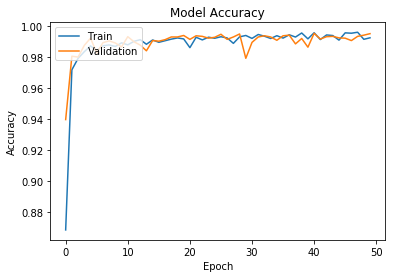

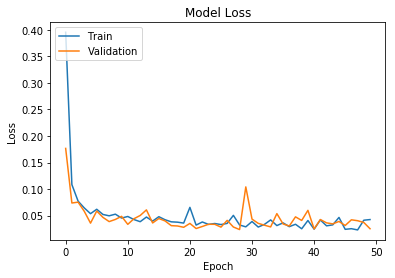

In [70]:
#Let's plot accuracy and loss over time on both our train and validation sets

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [71]:
#Evaluate model on the test set
model.evaluate(X_test, y_test, verbose=1)

5163/5163 [==============================] - 0s 57us/step


[0.02534239246579665, 0.9949641681193104]

In [72]:
# new instance where we do not know the answer
Xnew = np.array([[33180.0,82.0,13104.7,38.9,40.0,48.3,440.7,47.1,30.5,18.4,311.4,168.0,117.6,168.1,215.4,112.8,82.2,95.4,113.4,23.5,24.8,82.9,92.2,280.5,80.7,375.7,19.1,244.3,138.2,38.3,84.5,80.4,8.0,80.4,84.5,38.3,138.2,244.3,19.1,375.7,80.7,280.5,92.2,82.9,24.8,23.5,113.4,95.4,82.2,112.8,215.4,168.1,117.6,168.0,311.4,18.4,30.5,47.1,440.7,48.3,40.0,38.9,13104.7,82.0,33336.0,14.7,1544.8,22.0,65.7,88.6,72.3,54.2,72.3,14.8,108.2,112.5,41.4,89.8,132.4,215.2,67.1,29.9,109.6,30.5,13.8,113.9,72.5,159.5,123.3,284.6,61.2,133.4,76.0,118.7,51.4,15.0,36.0,15.0,51.4,118.7,76.0,133.4,61.2,284.6,123.3,159.5,72.5,113.9,13.8,30.5,109.6,29.9,67.1,215.2,132.4,89.8,41.4,112.5,108.2,14.8,72.3,54.2,72.3,88.6,65.7,22.0,1544.8,14.7]])
#scaler.transform uses the same parameters you used to scale training data, and scales the new incoming data
scaled_Xnew = scaler.transform(Xnew)
# make a prediction
ynew = model.predict_classes(scaled_Xnew)
# show the inputs and predicted outputs
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
print("Predicted=%s" % (ynew[0]))

Predicted=4


In [111]:
#IGNORE THIS CELL
def make_prediction():
    ser1 = serial.Serial('COM3', 115200) 
    WeHaveArray = False
    while(WeHaveArray==False):
        print('Loop has started lmao')
        arduinoData = ser1.readline().decode('ascii')
        #print(arduinoData)
        print('About to convert arduinoData')
        myArray = np.fromstring(arduinoData, dtype=float, sep=',')
        #print('ArduinoData has been converted')
        #if len(myArray)==128:
        #    print('Checking length, and about to check nans')
        #    if np.isnan(myArray).any()==False:
        #        print('checked for nans without fail')
        #        WeHaveArray = True
        #    else:
        #        print('We have an array without nans and 128 values lmao')
        #else:
         #   print('The length of array was not 128 lmao')
                  
    #scaler.transform uses the same parameters you used to scale training data, and scales the new incoming data
    #scaled_Xnew = scaler.transform(myArray)
    #print('Data has been scaled lmao')
    # make a prediction
    #ynew = model.predict_classes(scaled_Xnew)
    #print('Prediction has been made lmao')
    # show the inputs and predicted outputs
    #print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
    #print("Predicted=%s" % (ynew[0]))


File Removed!


In [349]:
def make_prediction():
    ser1 = serial.Serial('COM3', 115200) 
    i = 0
    WeHaveArray = False
    while WeHaveArray==False:
        while i<5:
            try:
                print('Loop has started lmao')      
                arduinoData = ser1.readline().decode('ascii')
                with open("make_prediction.txt", "a") as f:
                    writer = csv.writer(f)
                    writer.writerow([arduinoData])
                i=i+1
            except:
                print('Keyboard interrupt, re-trying')
        print('Done writing 5 lines')
        df = pd.read_csv('make_prediction.txt', header=None)
        df = pd.DataFrame(df[0].str.split(',').tolist())
        features = ['v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17',
            'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 
            'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49',
            'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58', 'v59', 'v60', 'v61', 'v62', 'v63', 
            'i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 
            'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 
            'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 
            'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63']
        if len(df.columns)==128:
            df.columns = features
            WeHaveArray = True
            #print(df.head())
            print('Successfully retrieved data in 128 columns!')
        else:
            print("The columns were all wrong! Delete file and try again")
            break
    df.i63 = df.i63.str.replace('\r\r\n','')
    print('Successfully cleaned the i63 column')
    clean_dataset(df)
    print('Successfully cleaned NaNs in the dataset')
    Xnew = np.array([df.iloc[2].values])
    scaled_Xnew = scaler.transform(Xnew)
    ynew = model.predict_classes(scaled_Xnew)
    if ynew[0]==0:
        print("\t\t\t\tPrediction = %s" % (ynew[0]) + 'which corresponds to No Load state')
    elif ynew[0]==1:
        print("\t\t\t\tPrediction = %s" % (ynew[0]) + 'which corresponds to Blow Drier Setting 2')
    elif ynew[0]==2:
        print("\t\t\t\tPrediction = %s" % (ynew[0]) + 'which corresponds to Edison Bulb')
    elif ynew[0]==3:
        print("\t\t\t\tPrediction = %s" % (ynew[0]) + 'which corresponds to Energy Saver')
    elif ynew[0]==4:
        print("\t\t\t\tPrediction = %s" % (ynew[0]) + 'which corresponds to Electric Kettle')
    elif ynew[0]==5:
        print("\t\t\t\tPrediction = %s" % (ynew[0]) + 'which corresponds to Edison Bulb + Blow Drier Setting 2')
    elif ynew[0]==6:
        print("\t\t\t\tPrediction = %s" % (ynew[0]) + 'which corresponds to Energy Saver + Blow Drier Setting 2')
    elif ynew[0]==7:
        print("\t\t\t\tPrediction = %s" % (ynew[0]) + 'which corresponds to Edison Bulb + Energy Saver')
    elif ynew[0]==8:
        print("\t\t\t\tPrediction = %s" % (ynew[0]) + 'which corresponds to Edison Bulb + Energy Saver + Blow Drier Setting 2')
    #Bar plot of voltage harmonics
    x=['v0','v1','v2','v3','v4','v5','v6','v7','v8','v9']
    fig, ax =plt.subplots(1,2, figsize=(15,5))
    a=sns.barplot(x,y[0:10],ax=ax[0])
    b=sns.barplot(x,y[0:10],ax=ax[1])
    a.axes.set_title('Voltage Harmonics')
    b.axes.set_title('Current Harmonics')
    fig.show()

In [294]:
os.remove("make_prediction.txt")
print("File Removed!")

File Removed!


In [366]:
os.remove("make_prediction.txt")
print("File Removed!")
make_prediction()

File Removed!
Loop has started lmao
Keyboard interrupt, re-trying
Loop has started lmao
Loop has started lmao
Loop has started lmao
Loop has started lmao
Loop has started lmao
Done writing 5 lines
Successfully retrieved data in 128 columns!
Successfully cleaned the i63 column
Successfully cleaned NaNs in the dataset
X=['32477.0' '9.2' '1501.7' '5.1' '3.0' '3.5' '51.7' '11.0' '6.8' '12.7'
 '25.9' '6.9' '8.4' '5.6' '9.7' '5.8' '15.1' '9.6' '11.0' '4.9' '3.4'
 '5.4' '4.2' '6.2' '8.9' '6.0' '11.4' '10.8' '5.8' '9.1' '8.3' '2.7' '3.0'
 '2.7' '8.3' '9.1' '5.8' '10.8' '11.4' '6.0' '8.9' '6.2' '4.2' '5.4' '3.4'
 '4.9' '11.0' '9.6' '15.1' '5.8' '9.7' '5.6' '8.4' '6.9' '25.9' '12.7'
 '6.8' '11.0' '51.7' '3.5' '3.0' '5.1' '1501.7' '9.2' '31147.0' '72.1'
 '13314.1' '71.9' '29.3' '27.4' '434.3' '7.6' '18.1' '16.2' '230.7' '14.0'
 '9.2' '3.5' '61.7' '5.3' '13.5' '7.1' '79.5' '9.8' '12.8' '2.7' '21.4'
 '6.3' '5.2' '7.3' '12.4' '13.1' '1.5' '6.2' '15.1' '6.1' '1.0' '6.1'
 '15.1' '6.2' '1.5' '13.1' '12